Accuracy: 0.81
Classification Report:
                       precision    recall  f1-score   support

Above Average Revenue       0.77      0.51      0.61        45
Below Average Revenue       0.82      0.93      0.87       105

             accuracy                           0.81       150
            macro avg       0.79      0.72      0.74       150
         weighted avg       0.80      0.81      0.79       150

[[23 22]
 [ 7 98]]


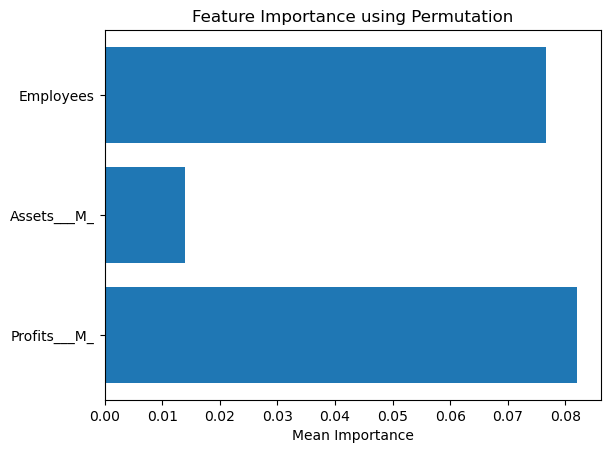

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = 'C://Users//alfre_g2qn6y7//OneDrive//Documents//Fortune 500 Companies.csv'
data = pd.read_csv(file_path)

# Select features and target
features = ['Profits___M_', 'Assets___M_', 'Employees']
target = 'Status'

# Split data into features and target
X = data[features]
y = data[target]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print(conf_matrix)


# Feature importance using permutation importance
result = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Plot feature importance
importance = result.importances_mean
feature_names = X.columns

plt.barh(feature_names, importance)
plt.xlabel("Mean Importance")
plt.title("Feature Importance using Permutation")
plt.show()


Accuracy: 0.80
Classification Report:
                       precision    recall  f1-score   support

Above Average Revenue       0.76      0.49      0.59        45
Below Average Revenue       0.81      0.93      0.87       105

             accuracy                           0.80       150
            macro avg       0.78      0.71      0.73       150
         weighted avg       0.79      0.80      0.79       150

[[22 23]
 [ 7 98]]


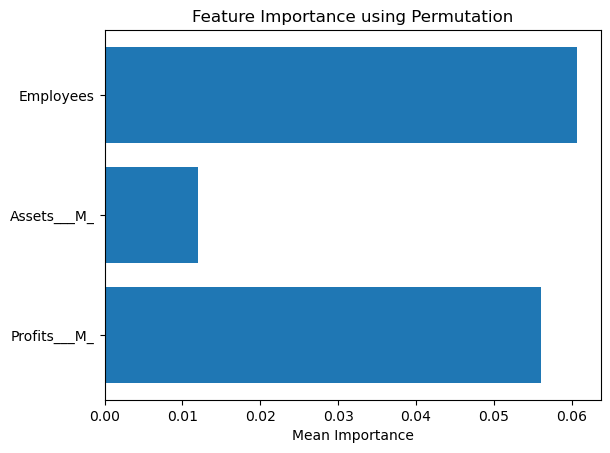

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
file_path = 'C://Users//alfre_g2qn6y7//OneDrive//Documents//Fortune 500 Companies.csv'
data = pd.read_csv(file_path)

# Select features and target
features = ['Profits___M_', 'Assets___M_', 'Employees']
target = 'Status'


# Split data into features and target
X = data[features]
y = data[target]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print(conf_matrix)


# Feature importance using permutation importance
result = permutation_importance(logreg_model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Plot feature importance
importance = result.importances_mean
feature_names = X.columns

plt.barh(feature_names, importance)
plt.xlabel("Mean Importance")
plt.title("Feature Importance using Permutation")
plt.show()
